In [1]:
print("Project name: Mobility Analytics")

Project name: Mobility Analytics


In [ ]:
# A brief on problem statement

In [ ]:
'''
Welcome to Sigma Cab Private Limited - a cab aggregator service. Their customers can download their app on smartphones and book
a cab from any where in the cities they operate in. They, in turn search for cabs from various service providers and provide the
best option to their client across available options. They have been in operation for little less than a year now. During this 
period, they have captured surge_pricing_type from the service providers.

You have been hired by Sigma Cabs as a Data Scientist and have been asked to build a predictive model, which could help them in
predicting the surge_pricing_type pro-actively. This would in turn help them in matching the right cabs with the right customers
quickly and efficiently.

The evaluation metric for this competition is Accuracy Score
'''

In [ ]:
# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import f1_score,roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB

In [ ]:
# Loading training and test dataset

In [18]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [ ]:
# Lets see our training dataset

In [4]:
train.head(3)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2


In [ ]:
# Last few rows

In [6]:
train.tail(3)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2
131661,T0005908514,31.96,A,7.0,2.93773,A,E,2.63875,1,102.0,57,85,Male,1


In [ ]:
# A few random rows

In [7]:
train.sample(4)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
126759,T0005900329,19.48,D,0.0,NaN,NaN,J,2.85500,2,NaN,47,59,Male,3
72446,T0005810004,64.98,D,10.0,NaN,NaN,A,4.08750,1,NaN,53,73,Male,3
78414,T0005820065,23.94,A,NaN,2.5211,B,A,2.64125,1,NaN,49,75,Female,1
86905,T0005834148,41.95,C,0.0,2.7382,A,A,3.34750,0,NaN,53,67,Male,2


In [ ]:
# shape of training dataset

In [8]:
train.shape

(131662, 14)

In [ ]:
# basic stats value

In [9]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [ ]:
# A brief summary of training dataset

In [10]:
pd.DataFrame({"TotalMissing":train.isna().sum(),"%Missing":train.isna().mean(),"DataType":train.dtypes,"Unique":train.nunique()})

,TotalMissing,%Missing,DataType,Unique
Trip_ID,0,0.000000,object,131662
Trip_Distance,0,0.000000,float64,10326
Type_of_Cab,20210,0.153499,object,5
Customer_Since_Months,5920,0.044964,float64,11
Life_Style_Index,20193,0.153370,float64,55978
Confidence_Life_Style_Index,20193,0.153370,object,3
Destination_Type,0,0.000000,object,14
Customer_Rating,0,0.000000,float64,3931
Cancellation_Last_1Month,0,0.000000,int64,9
Var1,71030,0.539487,float64,122


In [ ]:
# Lets explore test dataset

In [11]:
test.head(3)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male


In [ ]:
# a few rows from bottom

In [12]:
test.tail(3)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
87392,T0005908505,37.86,A,6.0,3.08227,C,A,1.63500,0,NaN,57,77,Male
87393,T0005908511,10.63,C,1.0,NaN,NaN,J,2.59875,1,107.0,51,77,Male
87394,T0005908515,37.96,B,10.0,3.00274,A,A,2.05500,0,NaN,48,73,Female


In [ ]:
# a few random rows

In [13]:
test.sample(3)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
13148,T0005722721,34.24,NaN,3.0,2.66834,A,A,2.29000,1,34.0,49,73,Female
60709,T0005841447,50.42,E,10.0,2.56219,B,A,3.13375,0,82.0,50,78,Male
82563,T0005896421,108.68,B,10.0,NaN,NaN,B,2.98625,0,111.0,49,70,Male


In [ ]:
# detailed summary of test dataset

In [14]:
pd.DataFrame({"TotalMissing":test.isna().sum(),"%Missing":test.isna().mean(),"DataType":test.dtypes,"Unique":test.nunique()})

,TotalMissing,%Missing,DataType,Unique
Trip_ID,0,0.000000,object,87395
Trip_Distance,0,0.000000,float64,9942
Type_of_Cab,13158,0.150558,object,5
Customer_Since_Months,3966,0.045380,float64,11
Life_Style_Index,13327,0.152492,float64,44857
Confidence_Life_Style_Index,13327,0.152492,object,3
Destination_Type,0,0.000000,object,14
Customer_Rating,0,0.000000,float64,3857
Cancellation_Last_1Month,0,0.000000,int64,9
Var1,46789,0.535374,float64,105


In [ ]:
# EDA

In [ ]:
# As mentioned in problem statement, we are dropping trip id from consideration

In [19]:
del train["Trip_ID"]
del test["Trip_ID"]

In [ ]:
# Trip distance

In [16]:
train["Trip_Distance"].min(),train["Trip_Distance"].max()

(0.31, 109.23)

In [ ]:
# Type of cab

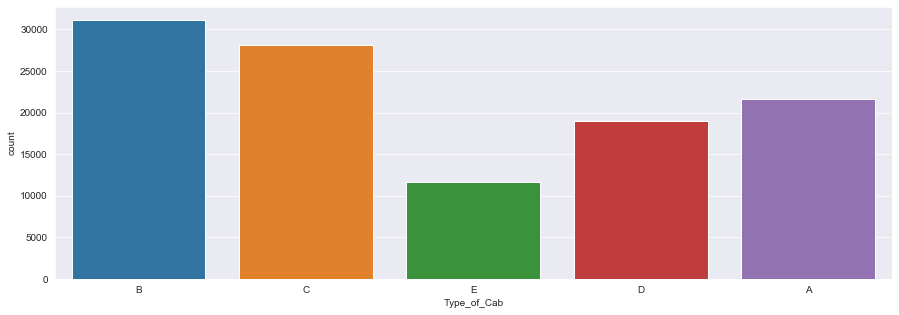

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(train["Type_of_Cab"])
plt.savefig("cabtype.png")

In [ ]:
# People prefer cab b the most

In [ ]:
# Lets fill missing values by mode

In [20]:
train["Type_of_Cab"].fillna(train["Type_of_Cab"].mode()[0],inplace=True)

In [ ]:
# Customer_Since_Months

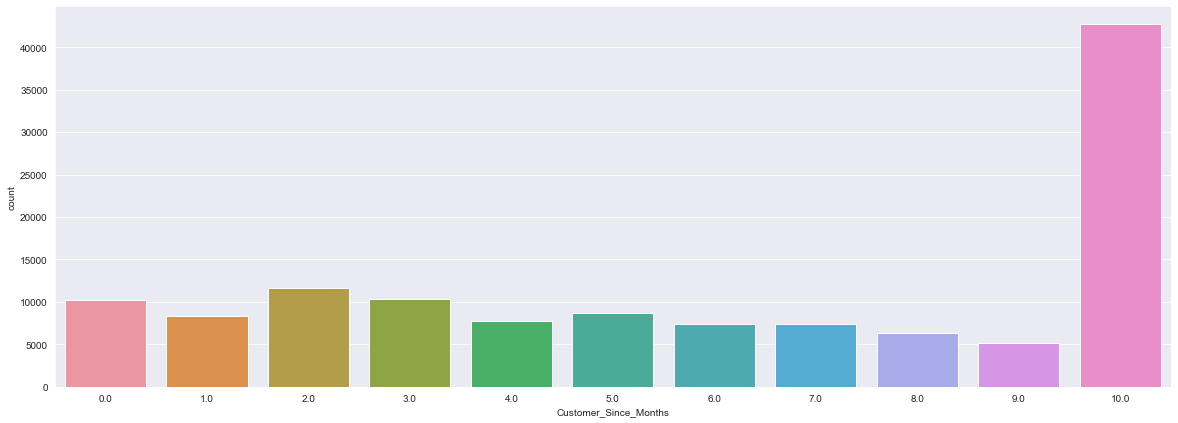

In [34]:
plt.figure(figsize=(20,7))
sns.countplot(train["Customer_Since_Months"])
plt.savefig("custten.png")

In [21]:
train["Customer_Since_Months"].fillna(train["Customer_Since_Months"].mode()[0],inplace=True)

In [ ]:
# Life_Style_Index

In [36]:
train["Life_Style_Index"].min(),train["Life_Style_Index"].max()

(1.59638, 4.87511)

In [22]:
train["Life_Style_Index"].fillna(train["Life_Style_Index"].mean(),inplace=True)

In [ ]:
# Confidence_Life_Style_Index

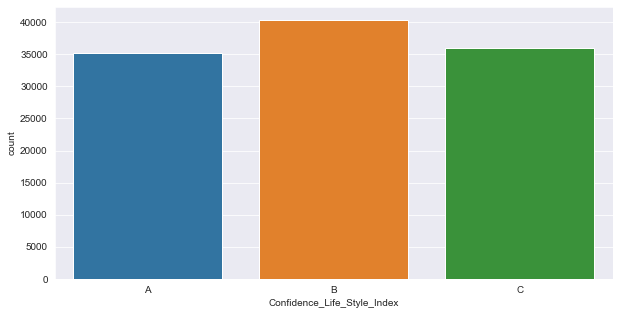

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(train["Confidence_Life_Style_Index"])
plt.savefig("con.png")

In [ ]:
# Imputting mean values inplace of nan

In [23]:
train["Confidence_Life_Style_Index"].fillna(train["Confidence_Life_Style_Index"].mode()[0],inplace=True)

In [ ]:
# Destination_Type

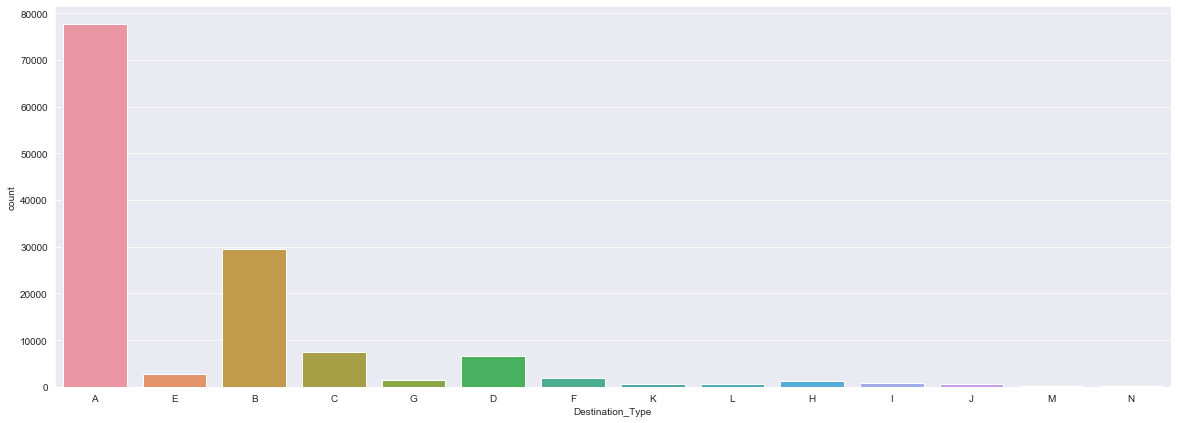

In [14]:
plt.figure(figsize=(20,7))
sns.countplot(train["Destination_Type"])
plt.savefig("dest.png")

In [ ]:
# Customer_Rating

In [15]:
train["Customer_Rating"].min(),train["Customer_Rating"].max()

(0.00125, 5.0)

In [ ]:
# Cancellation_Last_1Month

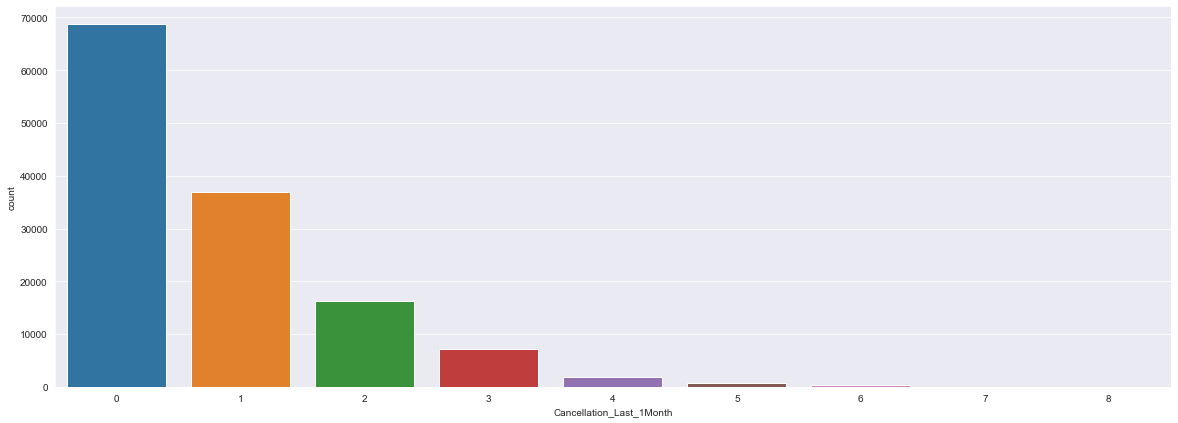

In [18]:
plt.figure(figsize=(20,7))
sns.countplot(train["Cancellation_Last_1Month"])
plt.savefig("can.png")

In [ ]:
# Var1

In [24]:
train["Var1"].fillna(train["Var1"].mean(),inplace=True)

In [ ]:
# Gender

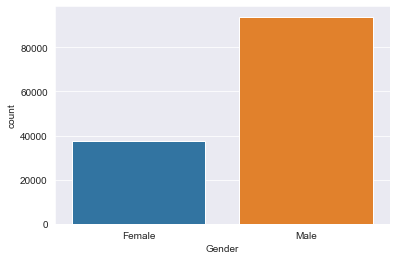

In [21]:
sns.countplot(train["Gender"])
plt.savefig("gen.png")

In [ ]:
# Surge_Pricing_Type

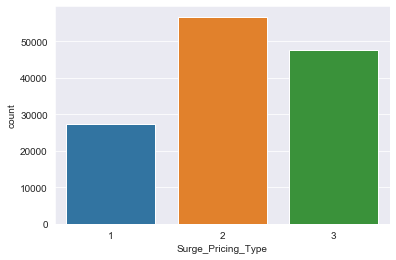

In [23]:
sns.countplot(train["Surge_Pricing_Type"])
plt.savefig("tar.png")

In [ ]:
# Bivariate analysis

In [25]:
train['Distance'] = 'na'
train.loc[(train.Trip_Distance >= 0) & (train.Trip_Distance <= 20), 'Distance'] = 'Under20'
train.loc[(train.Trip_Distance >= 20.00001) & (train.Trip_Distance <= 40), 'Distance'] = 'Under40'
train.loc[(train.Trip_Distance >= 40.00001) & (train.Trip_Distance <= 60), 'Distance'] = 'Under60'
train.loc[(train.Trip_Distance >= 60.00001) & (train.Trip_Distance <= 80), 'Distance'] = 'Under80'
train.loc[(train.Trip_Distance >= 80.00001) & (train.Trip_Distance <= 100), 'Distance'] = 'Under100'
train.loc[(train.Trip_Distance >= 100.00001) & (train.Trip_Distance <= 120), 'Distance'] = 'Under120'

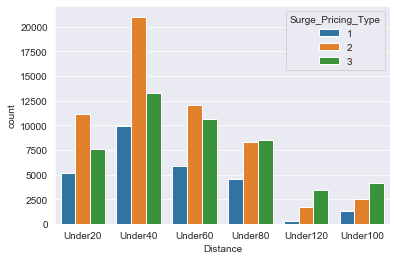

In [26]:
sns.countplot(x=train["Distance"],hue=train["Surge_Pricing_Type"],data=train)

In [ ]:
# Type_of_Cab

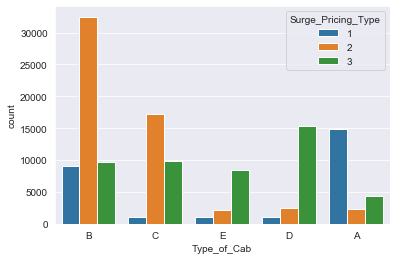

In [28]:
sns.countplot(x=train["Type_of_Cab"],hue=train["Surge_Pricing_Type"],data=train)

In [ ]:
# Customer_Since_Months

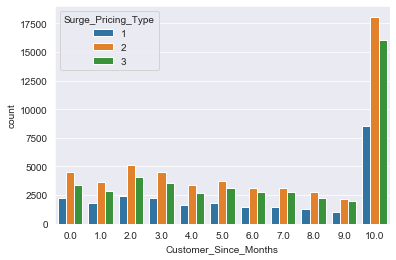

In [8]:
sns.countplot(x=train["Customer_Since_Months"],hue=train["Surge_Pricing_Type"],data=train)

In [ ]:
# Life_Style_Index

In [27]:
train['Lifestyle'] = 'na'
train.loc[(train.Life_Style_Index >= 1.5) & (train.Life_Style_Index <= 2.0), 'Lifestyle'] = 'Under2'
train.loc[(train.Life_Style_Index >= 2.00001) & (train.Life_Style_Index <= 2.5), 'Lifestyle'] = 'Under2.5'
train.loc[(train.Life_Style_Index >= 2.500001) & (train.Life_Style_Index <= 3.0), 'Lifestyle'] = 'Under3'
train.loc[(train.Life_Style_Index >= 3.00001) & (train.Life_Style_Index <= 3.5), 'Lifestyle'] = 'Under3.5'
train.loc[(train.Life_Style_Index >= 3.500001) & (train.Life_Style_Index <= 4.0), 'Lifestyle'] = 'Under4'
train.loc[(train.Life_Style_Index >= 4.00001) & (train.Life_Style_Index <= 4.5), 'Lifestyle'] = 'Under4.5'
train.loc[(train.Life_Style_Index >= 4.500001) & (train.Life_Style_Index <= 5), 'Lifestyle'] = 'Under5'

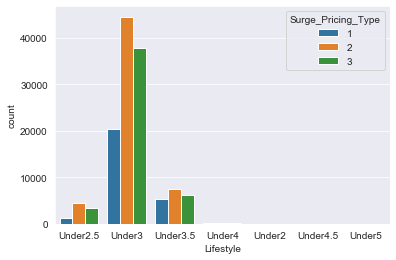

In [28]:
sns.countplot(x=train["Lifestyle"],hue=train["Surge_Pricing_Type"],data=train)

In [ ]:
# Customer_Rating

In [29]:
train.Customer_Rating.min(),train.Customer_Rating.max()

(0.00125, 5.0)

In [30]:
train['Custrating'] = 'na'
train.loc[(train.Customer_Rating >= 0.00001) & (train.Customer_Rating <= 1.0), 'Custrating'] = 'Under1'
train.loc[(train.Customer_Rating >= 1.00001) & (train.Customer_Rating <= 2.0), 'Custrating'] = 'Under2'
train.loc[(train.Customer_Rating >= 2.00001) & (train.Customer_Rating <= 3.0), 'Custrating'] = 'Under3'
train.loc[(train.Customer_Rating >= 3.00001) & (train.Customer_Rating <= 4.0), 'Custrating'] = 'Under4'
train.loc[(train.Customer_Rating >= 4.00001) & (train.Customer_Rating <= 5.0), 'Custrating'] = 'Under5'

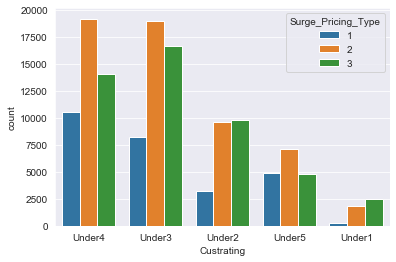

In [31]:
sns.countplot(x=train["Custrating"],hue=train["Surge_Pricing_Type"],data=train)

In [34]:
train["Var1"].min(),train["Var1"].max()

(30.0, 210.0)

In [35]:
train['Variable1'] = 'na'
train.loc[(train.Var1 >= 30.0) & (train.Var1 <= 60.0), 'Variable1'] = 'Under60'
train.loc[(train.Var1 >= 60.00001) & (train.Var1 <= 90.0), 'Variable1'] = 'Under90'
train.loc[(train.Var1 >= 90.00001) & (train.Var1 <= 120.0), 'Variable1'] = 'Under120'
train.loc[(train.Var1 >= 120.00001) & (train.Var1 <= 150.0), 'Variable1'] = 'Under150'
train.loc[(train.Var1 >= 150.00001) & (train.Var1 <= 180.0), 'Variable1'] = 'Under180'
train.loc[(train.Var1 >= 180.00001) & (train.Var1 <= 210.0), 'Variable1'] = 'Under210'

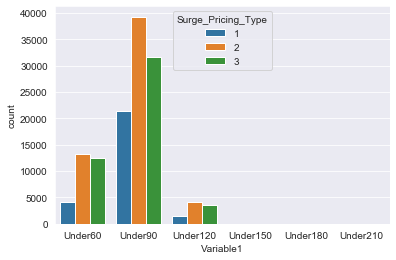

In [38]:
sns.countplot(x=train["Variable1"],hue=train["Surge_Pricing_Type"],data=train)

In [ ]:
# Var2

In [39]:
train["Var2"].min(),train["Var2"].max()

(40, 124)

In [40]:
train['Variable2'] = 'na'
train.loc[(train.Var2 >= 40.0) & (train.Var2 <= 82.0), 'Variable2'] = 'Under82'
train.loc[(train.Var2 >= 82.00001) & (train.Var2 <= 124.0), 'Variable2'] = 'Under124'

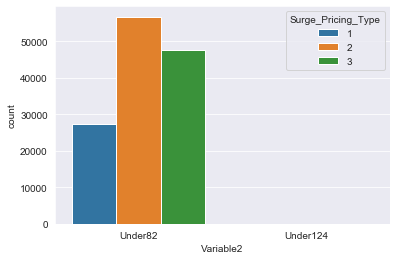

In [43]:
sns.countplot(x=train["Variable2"],hue=train["Surge_Pricing_Type"],data=train)

In [ ]:
# Var3

In [45]:
train["Var3"].min(),train["Var3"].max()

(52, 206)

In [46]:
train['Variable3'] = 'na'
train.loc[(train.Var3 >= 52.0) & (train.Var3 <= 82.8), 'Variable3'] = 'Under82'
train.loc[(train.Var3 >= 82.800001) & (train.Var3 <= 113.6), 'Variable3'] = 'Under113'
train.loc[(train.Var3 >= 113.600001) & (train.Var3 <= 144.4), 'Variable3'] = 'Under144'
train.loc[(train.Var3 >= 144.400001) & (train.Var3 <= 175.2), 'Variable3'] = 'Under175'
train.loc[(train.Var3 >= 175.200001) & (train.Var3 <= 206.0), 'Variable3'] = 'Under206'

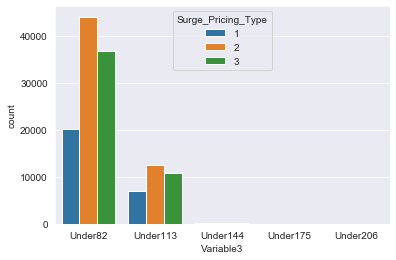

In [47]:
sns.countplot(x=train["Variable3"],hue=train["Surge_Pricing_Type"],data=train)

In [ ]:
# Lets see the training dataset

In [48]:
train.head(5)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type,Distance,Lifestyle,Custrating,Variable1,Variable2,Variable3
0,6.77,B,1.0,2.427690,A,A,3.90500,0,40.000000,46,60,Female,2,Under20,Under2.5,Under4,Under60,Under82,Under82
1,29.47,B,10.0,2.782450,B,A,3.45000,0,38.000000,56,78,Male,2,Under40,Under3,Under4,Under60,Under82,Under82
2,41.58,B,10.0,2.802064,B,E,3.50125,2,64.202698,56,77,Male,2,Under60,Under3,Under4,Under90,Under82,Under82
3,61.56,C,10.0,2.802064,B,A,3.45375,0,64.202698,52,74,Male,3,Under80,Under3,Under4,Under90,Under82,Under82
4,54.95,C,10.0,3.034530,B,A,3.40250,4,51.000000,49,102,Male,2,Under60,Under3.5,Under4,Under60,Under82,Under113


In [ ]:
# Encoding all categorical variables

In [49]:
le=LabelEncoder()

In [50]:
train["Type_of_Cab"]=le.fit_transform(train["Type_of_Cab"])
train["Confidence_Life_Style_Index"]=le.fit_transform(train["Confidence_Life_Style_Index"])
train["Destination_Type"]=le.fit_transform(train["Destination_Type"])
train["Gender"]=le.fit_transform(train["Gender"])
train["Distance"]=le.fit_transform(train["Distance"])
train["Lifestyle"]=le.fit_transform(train["Lifestyle"])
train["Custrating"]=le.fit_transform(train["Custrating"])
train["Variable1"]=le.fit_transform(train["Variable1"])
train["Variable2"]=le.fit_transform(train["Variable2"])
train["Variable3"]=le.fit_transform(train["Variable3"])

In [ ]:
# Lets check again train dataset

In [51]:
train.head(3)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type,Distance,Lifestyle,Custrating,Variable1,Variable2,Variable3
0,6.77,1,1.0,2.427690,0,0,3.90500,0,40.000000,46,60,0,2,2,1,3,4,1,4
1,29.47,1,10.0,2.782450,1,0,3.45000,0,38.000000,56,78,1,2,3,2,3,4,1,4
2,41.58,1,10.0,2.802064,1,4,3.50125,2,64.202698,56,77,1,2,4,2,3,5,1,4


In [ ]:
# Lets process test dataset

In [53]:
test.isna().sum()

Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [54]:
test["Type_of_Cab"].fillna(test["Type_of_Cab"].mode()[0],inplace=True)
test["Customer_Since_Months"].fillna(test["Customer_Since_Months"].mode()[0],inplace=True)
test["Life_Style_Index"].fillna(test["Life_Style_Index"].mean(),inplace=True)
test["Confidence_Life_Style_Index"].fillna(test["Confidence_Life_Style_Index"].mode()[0],inplace=True)
test["Var1"].fillna(test["Var1"].mean(),inplace=True)

In [55]:
test.Trip_Distance.min(),test.Trip_Distance.max()

(1.55, 109.23)

In [56]:
test['Distance'] = 'na'
test.loc[(test.Trip_Distance >= 0) & (test.Trip_Distance <= 20), 'Distance'] = 'Under20'
test.loc[(test.Trip_Distance >= 20.00001) & (test.Trip_Distance <= 40), 'Distance'] = 'Under40'
test.loc[(test.Trip_Distance >= 40.00001) & (test.Trip_Distance <= 60), 'Distance'] = 'Under60'
test.loc[(test.Trip_Distance >= 60.00001) & (test.Trip_Distance <= 80), 'Distance'] = 'Under80'
test.loc[(test.Trip_Distance >= 80.00001) & (test.Trip_Distance <= 100), 'Distance'] = 'Under100'
test.loc[(test.Trip_Distance >= 100.00001) & (test.Trip_Distance <= 120), 'Distance'] = 'Under120'

In [57]:
train.Life_Style_Index.min(),train.Life_Style_Index.max()

(1.59638, 4.87511)

In [58]:
test['Lifestyle'] = 'na'
test.loc[(test.Life_Style_Index >= 1.5) & (test.Life_Style_Index <= 2.0), 'Lifestyle'] = 'Under2'
test.loc[(test.Life_Style_Index >= 2.00001) & (test.Life_Style_Index <= 2.5), 'Lifestyle'] = 'Under2.5'
test.loc[(test.Life_Style_Index >= 2.500001) & (test.Life_Style_Index <= 3.0), 'Lifestyle'] = 'Under3'
test.loc[(test.Life_Style_Index >= 3.00001) & (test.Life_Style_Index <= 3.5), 'Lifestyle'] = 'Under3.5'
test.loc[(test.Life_Style_Index >= 3.500001) & (test.Life_Style_Index <= 4.0), 'Lifestyle'] = 'Under4'
test.loc[(test.Life_Style_Index >= 4.00001) & (test.Life_Style_Index <= 4.5), 'Lifestyle'] = 'Under4.5'
test.loc[(test.Life_Style_Index >= 4.500001) & (test.Life_Style_Index <= 5), 'Lifestyle'] = 'Under5'

In [59]:
test["Customer_Rating"].min(),test["Customer_Rating"].max()

(0.00125, 5.0)

In [60]:
test['Custrating'] = 'na'
test.loc[(test.Customer_Rating >= 0.00001) & (test.Customer_Rating <= 1.0), 'Custrating'] = 'Under1'
test.loc[(test.Customer_Rating >= 1.00001) & (test.Customer_Rating <= 2.0), 'Custrating'] = 'Under2'
test.loc[(test.Customer_Rating >= 2.00001) & (test.Customer_Rating <= 3.0), 'Custrating'] = 'Under3'
test.loc[(test.Customer_Rating >= 3.00001) & (test.Customer_Rating <= 4.0), 'Custrating'] = 'Under4'
test.loc[(test.Customer_Rating >= 4.00001) & (test.Customer_Rating <= 5.0), 'Custrating'] = 'Under5'

In [61]:
test["Var1"].min(),test["Var1"].max()

(30.0, 178.0)

In [63]:
test['Variable1'] = 'na'
test.loc[(test.Var1 >= 30.0) & (test.Var1 <= 60.0), 'Variable1'] = 'Under60'
test.loc[(test.Var1 >= 60.00001) & (test.Var1 <= 90.0), 'Variable1'] = 'Under90'
test.loc[(test.Var1 >= 90.00001) & (test.Var1 <= 120.0), 'Variable1'] = 'Under120'
test.loc[(test.Var1 >= 120.00001) & (test.Var1 <= 150.0), 'Variable1'] = 'Under150'
test.loc[(test.Var1 >= 150.00001) & (test.Var1 <= 180.0), 'Variable1'] = 'Under180'
test.loc[(test.Var1 >= 180.00001) & (test.Var1 <= 210.0), 'Variable1'] = 'Under210'

In [64]:
test["Var2"].min(),test["Var2"].max()

(41, 116)

In [65]:
test['Variable2'] = 'na'
test.loc[(test.Var2 >= 40.0) & (test.Var2 <= 82.0), 'Variable2'] = 'Under82'
test.loc[(test.Var2 >= 82.00001) & (test.Var2 <= 124.0), 'Variable2'] = 'Under124'

In [66]:
test['Variable3'] = 'na'
test.loc[(test.Var3 >= 52.0) & (test.Var3 <= 82.8), 'Variable3'] = 'Under82'
test.loc[(test.Var3 >= 82.800001) & (test.Var3 <= 113.6), 'Variable3'] = 'Under113'
test.loc[(test.Var3 >= 113.600001) & (test.Var3 <= 144.4), 'Variable3'] = 'Under144'
test.loc[(test.Var3 >= 144.400001) & (test.Var3 <= 175.2), 'Variable3'] = 'Under175'
test.loc[(test.Var3 >= 175.200001) & (test.Var3 <= 206.0), 'Variable3'] = 'Under206'

In [ ]:
# encoding

In [67]:
test["Type_of_Cab"]=le.fit_transform(test["Type_of_Cab"])
test["Confidence_Life_Style_Index"]=le.fit_transform(test["Confidence_Life_Style_Index"])
test["Destination_Type"]=le.fit_transform(test["Destination_Type"])
test["Gender"]=le.fit_transform(test["Gender"])
test["Distance"]=le.fit_transform(test["Distance"])
test["Lifestyle"]=le.fit_transform(test["Lifestyle"])
test["Custrating"]=le.fit_transform(test["Custrating"])
test["Variable1"]=le.fit_transform(test["Variable1"])
test["Variable2"]=le.fit_transform(test["Variable2"])
test["Variable3"]=le.fit_transform(test["Variable3"])

In [ ]:
# Test data

In [68]:
test.head(3)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Distance,Lifestyle,Custrating,Variable1,Variable2,Variable3
0,9.44,0,10.0,2.57438,0,1,3.68000,2,63.93661,46,63,1,2,2,3,4,1,3
1,32.15,1,10.0,2.85143,0,0,1.59375,0,65.00000,49,80,0,3,2,1,4,1,3
2,10.38,2,4.0,2.70530,0,3,4.50500,0,63.93661,47,74,1,2,2,4,4,1,3


In [69]:
y=train["Surge_Pricing_Type"]
x=train.drop("Surge_Pricing_Type",axis=1)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[8.82048218e-02 2.48884512e-01 6.11253767e-02 7.92609418e-02
 2.81257716e-02 4.71069329e-02 8.34249071e-02 3.86307853e-02
 5.34996422e-02 7.49311528e-02 7.82774751e-02 2.39016503e-02
 2.80584138e-02 1.67328208e-02 2.21246726e-02 1.81240688e-02
 8.19969559e-05 9.50405772e-03]


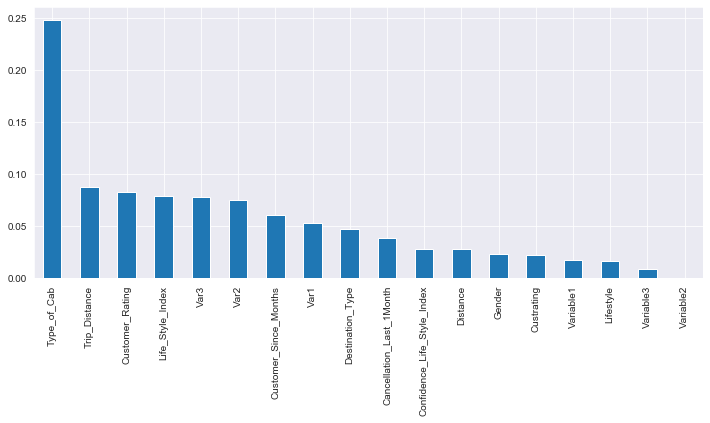

In [71]:
fig=plt.figure(figsize=(12,5))
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(19).plot(kind='bar')
plt.show()

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [73]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
prediction=etc.predict(x_test)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score is 0.6430036203448188


In [74]:
mn=MultinomialNB()
mn.fit(x_train,y_train)
prediction=mn.predict(x_test)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))

accuracy score is 0.5198106281171675


In [75]:
cnb=ComplementNB()
cnb.fit(x_train,y_train)
prediction=cnb.predict(x_test)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))

accuracy score is 0.48568318185270515


In [76]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy score is 0.6280665333299578


In [77]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
prediction=bc.predict(x_test)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))

accuracy score is 0.6494341628901997


In [78]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score is 0.6524975315830781


In [79]:
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))

accuracy score is 0.5654320362540823


In [80]:
xgb=XGBClassifier()
prediction= xgb.fit(x_train,y_train).predict(x_test)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))

accuracy score is 0.6928529836198385


In [81]:
import catboost as cb

In [82]:
cat_rg1 = cb.CatBoostClassifier()
cat_rg1.fit(x_train,y_train)
prediction=cat_rg1.predict(x_test)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))

Learning rate set to 0.099659
0:	learn: 1.0414795	total: 128ms	remaining: 2m 8s
1:	learn: 0.9973109	total: 173ms	remaining: 1m 26s
2:	learn: 0.9605929	total: 226ms	remaining: 1m 15s
3:	learn: 0.9306964	total: 287ms	remaining: 1m 11s
4:	learn: 0.9065757	total: 337ms	remaining: 1m 7s
5:	learn: 0.8860366	total: 385ms	remaining: 1m 3s
6:	learn: 0.8694632	total: 432ms	remaining: 1m 1s
7:	learn: 0.8555908	total: 482ms	remaining: 59.8s
8:	learn: 0.8441067	total: 528ms	remaining: 58.2s
9:	learn: 0.8332612	total: 576ms	remaining: 57s
10:	learn: 0.8245787	total: 629ms	remaining: 56.5s
11:	learn: 0.8171400	total: 673ms	remaining: 55.4s
12:	learn: 0.8099914	total: 721ms	remaining: 54.7s
13:	learn: 0.8040721	total: 764ms	remaining: 53.8s
14:	learn: 0.7991039	total: 833ms	remaining: 54.7s
15:	learn: 0.7948620	total: 899ms	remaining: 55.3s
16:	learn: 0.7909376	total: 966ms	remaining: 55.8s
17:	learn: 0.7867456	total: 1.02s	remaining: 55.9s
18:	learn: 0.7830963	total: 1.07s	remaining: 55.5s
19:	learn:

162:	learn: 0.7144589	total: 7.83s	remaining: 40.2s
163:	learn: 0.7142505	total: 7.9s	remaining: 40.3s
164:	learn: 0.7141326	total: 7.94s	remaining: 40.2s
165:	learn: 0.7139786	total: 7.98s	remaining: 40.1s
166:	learn: 0.7138442	total: 8.02s	remaining: 40s
167:	learn: 0.7137536	total: 8.06s	remaining: 39.9s
168:	learn: 0.7135943	total: 8.11s	remaining: 39.9s
169:	learn: 0.7134299	total: 8.16s	remaining: 39.9s
170:	learn: 0.7133177	total: 8.22s	remaining: 39.8s
171:	learn: 0.7132043	total: 8.27s	remaining: 39.8s
172:	learn: 0.7130526	total: 8.32s	remaining: 39.8s
173:	learn: 0.7129433	total: 8.36s	remaining: 39.7s
174:	learn: 0.7126986	total: 8.41s	remaining: 39.6s
175:	learn: 0.7126216	total: 8.45s	remaining: 39.6s
176:	learn: 0.7125193	total: 8.5s	remaining: 39.5s
177:	learn: 0.7123272	total: 8.55s	remaining: 39.5s
178:	learn: 0.7122084	total: 8.6s	remaining: 39.5s
179:	learn: 0.7121067	total: 8.66s	remaining: 39.5s
180:	learn: 0.7120117	total: 8.72s	remaining: 39.5s
181:	learn: 0.711

324:	learn: 0.6992523	total: 15.5s	remaining: 32.2s
325:	learn: 0.6991854	total: 15.6s	remaining: 32.2s
326:	learn: 0.6990824	total: 15.6s	remaining: 32.1s
327:	learn: 0.6990364	total: 15.7s	remaining: 32.1s
328:	learn: 0.6989424	total: 15.7s	remaining: 32s
329:	learn: 0.6989039	total: 15.7s	remaining: 32s
330:	learn: 0.6988255	total: 15.8s	remaining: 31.9s
331:	learn: 0.6987828	total: 15.8s	remaining: 31.9s
332:	learn: 0.6986872	total: 15.9s	remaining: 31.8s
333:	learn: 0.6985828	total: 15.9s	remaining: 31.8s
334:	learn: 0.6984658	total: 16s	remaining: 31.7s
335:	learn: 0.6984171	total: 16s	remaining: 31.7s
336:	learn: 0.6983218	total: 16.1s	remaining: 31.7s
337:	learn: 0.6982547	total: 16.1s	remaining: 31.6s
338:	learn: 0.6981889	total: 16.2s	remaining: 31.6s
339:	learn: 0.6981263	total: 16.2s	remaining: 31.5s
340:	learn: 0.6980778	total: 16.3s	remaining: 31.5s
341:	learn: 0.6980017	total: 16.3s	remaining: 31.4s
342:	learn: 0.6979666	total: 16.4s	remaining: 31.4s
343:	learn: 0.697942

486:	learn: 0.6882023	total: 23.2s	remaining: 24.5s
487:	learn: 0.6881248	total: 23.3s	remaining: 24.4s
488:	learn: 0.6880521	total: 23.3s	remaining: 24.4s
489:	learn: 0.6879792	total: 23.4s	remaining: 24.3s
490:	learn: 0.6879464	total: 23.4s	remaining: 24.3s
491:	learn: 0.6878488	total: 23.4s	remaining: 24.2s
492:	learn: 0.6877379	total: 23.5s	remaining: 24.2s
493:	learn: 0.6876658	total: 23.5s	remaining: 24.1s
494:	learn: 0.6875514	total: 23.6s	remaining: 24.1s
495:	learn: 0.6875085	total: 23.6s	remaining: 24s
496:	learn: 0.6874803	total: 23.7s	remaining: 24s
497:	learn: 0.6874183	total: 23.7s	remaining: 23.9s
498:	learn: 0.6873627	total: 23.8s	remaining: 23.9s
499:	learn: 0.6873141	total: 23.8s	remaining: 23.8s
500:	learn: 0.6872577	total: 23.9s	remaining: 23.8s
501:	learn: 0.6871872	total: 23.9s	remaining: 23.7s
502:	learn: 0.6871385	total: 23.9s	remaining: 23.7s
503:	learn: 0.6870877	total: 24s	remaining: 23.6s
504:	learn: 0.6870142	total: 24s	remaining: 23.6s
505:	learn: 0.686959

645:	learn: 0.6787466	total: 30.5s	remaining: 16.7s
646:	learn: 0.6786996	total: 30.5s	remaining: 16.6s
647:	learn: 0.6786379	total: 30.5s	remaining: 16.6s
648:	learn: 0.6785791	total: 30.6s	remaining: 16.5s
649:	learn: 0.6785222	total: 30.6s	remaining: 16.5s
650:	learn: 0.6784971	total: 30.7s	remaining: 16.4s
651:	learn: 0.6784330	total: 30.7s	remaining: 16.4s
652:	learn: 0.6783499	total: 30.8s	remaining: 16.4s
653:	learn: 0.6782997	total: 30.8s	remaining: 16.3s
654:	learn: 0.6782544	total: 30.9s	remaining: 16.3s
655:	learn: 0.6781831	total: 30.9s	remaining: 16.2s
656:	learn: 0.6781087	total: 31s	remaining: 16.2s
657:	learn: 0.6780397	total: 31s	remaining: 16.1s
658:	learn: 0.6780175	total: 31s	remaining: 16.1s
659:	learn: 0.6779641	total: 31.1s	remaining: 16s
660:	learn: 0.6779044	total: 31.2s	remaining: 16s
661:	learn: 0.6778881	total: 31.2s	remaining: 15.9s
662:	learn: 0.6778334	total: 31.3s	remaining: 15.9s
663:	learn: 0.6777945	total: 31.3s	remaining: 15.8s
664:	learn: 0.6777267	

808:	learn: 0.6697444	total: 38.3s	remaining: 9.04s
809:	learn: 0.6696842	total: 38.3s	remaining: 8.99s
810:	learn: 0.6696079	total: 38.4s	remaining: 8.94s
811:	learn: 0.6695691	total: 38.4s	remaining: 8.89s
812:	learn: 0.6695033	total: 38.5s	remaining: 8.84s
813:	learn: 0.6694565	total: 38.5s	remaining: 8.8s
814:	learn: 0.6694047	total: 38.6s	remaining: 8.75s
815:	learn: 0.6693479	total: 38.6s	remaining: 8.7s
816:	learn: 0.6693091	total: 38.7s	remaining: 8.66s
817:	learn: 0.6692301	total: 38.7s	remaining: 8.61s
818:	learn: 0.6691707	total: 38.7s	remaining: 8.56s
819:	learn: 0.6691192	total: 38.8s	remaining: 8.52s
820:	learn: 0.6690562	total: 38.8s	remaining: 8.47s
821:	learn: 0.6689905	total: 38.9s	remaining: 8.42s
822:	learn: 0.6689405	total: 38.9s	remaining: 8.37s
823:	learn: 0.6688825	total: 39s	remaining: 8.32s
824:	learn: 0.6688345	total: 39s	remaining: 8.28s
825:	learn: 0.6688039	total: 39.1s	remaining: 8.23s
826:	learn: 0.6687470	total: 39.1s	remaining: 8.18s
827:	learn: 0.6687

969:	learn: 0.6610013	total: 45.7s	remaining: 1.41s
970:	learn: 0.6609252	total: 45.8s	remaining: 1.37s
971:	learn: 0.6608692	total: 45.8s	remaining: 1.32s
972:	learn: 0.6608012	total: 45.9s	remaining: 1.27s
973:	learn: 0.6607759	total: 45.9s	remaining: 1.23s
974:	learn: 0.6607533	total: 46s	remaining: 1.18s
975:	learn: 0.6606983	total: 46s	remaining: 1.13s
976:	learn: 0.6606281	total: 46s	remaining: 1.08s
977:	learn: 0.6605897	total: 46.1s	remaining: 1.04s
978:	learn: 0.6605111	total: 46.1s	remaining: 990ms
979:	learn: 0.6604560	total: 46.2s	remaining: 943ms
980:	learn: 0.6604198	total: 46.2s	remaining: 896ms
981:	learn: 0.6603859	total: 46.3s	remaining: 848ms
982:	learn: 0.6603305	total: 46.3s	remaining: 801ms
983:	learn: 0.6602704	total: 46.4s	remaining: 754ms
984:	learn: 0.6602570	total: 46.4s	remaining: 707ms
985:	learn: 0.6602089	total: 46.5s	remaining: 660ms
986:	learn: 0.6601659	total: 46.5s	remaining: 613ms
987:	learn: 0.6601525	total: 46.6s	remaining: 566ms
988:	learn: 0.6600

In [83]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
prediction=sgd.predict(x_test)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))

accuracy score is 0.40271905617863746


In [84]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))

accuracy score is 0.48327805767234616


In [85]:
xgb=XGBClassifier()
prediction= xgb.fit(x,y).predict(test)

In [89]:
final_prediction=pd.DataFrame({"Trip_ID":sample["Trip_ID"],"Surge_Pricing_Type":prediction})

In [90]:
final_prediction.to_csv("Mo1.csv",index=False)

In [86]:
sample=pd.read_csv("test.csv")

In [87]:
sample.head(1)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68,2,NaN,46,63,Male
